# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import category_encoders

# Importing The Dataset

In [2]:
dataset = pd.read_csv('Page_Content.csv')
labeled_datadset = pd.read_csv('Page Purpose Labeld Data.csv')

# Data Cleaning

In [3]:
# creating the labeled training set
df = pd.merge(dataset, labeled_datadset, how = "right", on =['Page URL'], )
df.shape

(459, 3)

In [4]:
# removing rows with empty 'Page Content' cells
df = df.dropna(subset = ["Page Content"], how = "all")

In [5]:
df.shape

(430, 3)

In [6]:
# creating a label encoder (did not use in final model)
#enc = category_encoders.one_hot.OneHotEncoder(cols = ['Page Purpose'], drop_invariant = False, use_cat_names = True, return_df = True,)
# df2 = enc.fit_transform(df)
# df2 = df2.drop(['Page Purpose_-1'], axis = 1)
# df2

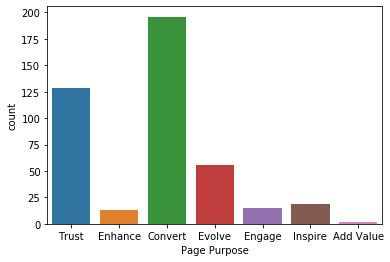

In [8]:
# labels represented in the labeled training set
sns.countplot(df['Page Purpose'])

# Text Cleaning

In [9]:
# importing text cleaning libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [10]:
# Text cleaning function
def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation ]
    test_punc_removed_join = ''.join(test_punc_removed)
    test_punc_removed_join_nums = re.sub('[^a-zA-Z]+', ' ', test_punc_removed_join)
    test_punc_removed_join_nums_clean = [word for word in test_punc_removed_join_nums.split() if word.lower() not in stopwords.words('english')]
    return test_punc_removed_join_nums_clean
    

In [11]:
# Vectorizing the text
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning)
df_countvectorizer = vectorizer.fit_transform(df2['Page Content'])
print(vectorizer.get_feature_names())

['AA', 'AAQEP', 'AAS', 'ABC', 'ACBSP', 'ACEIThe', 'ACEIThis', 'ACEInWGU', 'ACT', 'ADN', 'AHIMA', 'AI', 'AIS', 'ANA', 'AONE', 'AONExa', 'AP', 'APA', 'API', 'APIB', 'APII', 'ASCD', 'ATI', 'ATT', 'AWS', 'AXELOS', 'Absolutely', 'Academic', 'Academies', 'Academy', 'Academyxa', 'Accelerate', 'Acceptance', 'Accepted', 'According', 'Accountant', 'Accountants', 'Accounting', 'Accreditation', 'AccreditationInternational', 'Accredited', 'Accrediting', 'Acquire', 'Act', 'ActnIf', 'Actually', 'Adding', 'Additional', 'Additionally', 'Adequate', 'Administration', 'AdministrationAssociate', 'Administrative', 'Administrator', 'Administrators', 'Admission', 'AdmissionTransferringn', 'Admissions', 'Advanced', 'Advancing', 'Advisory', 'Aetna', 'Affairs', 'Affordable', 'Agency', 'Agreement', 'Aid', 'Air', 'Airlines', 'Alabama', 'Alaska', 'Alaskan', 'Albrecht', 'Alfred', 'Allow', 'Almost', 'Along', 'Already', 'Also', 'Alternative', 'Although', 'Amazon', 'America', 'American', 'Americans', 'Americas', 'Among

In [14]:
print(df_countvectorizer.toarray())

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
df_countvectorizer.shape

(430, 9150)

# Splitting Train & Test Sets

In [23]:
# labeling the X and y data
X = df_countvectorizer
y = label

In [27]:
# Spliting the training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [31]:
# Training the Niave Bayes classifier
from sklearn.naive_bayes import MultinomialNB
NB_Classifier = MultinomialNB()
NB_Classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Evaluating the Model

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_Classifier.predict(X_train)

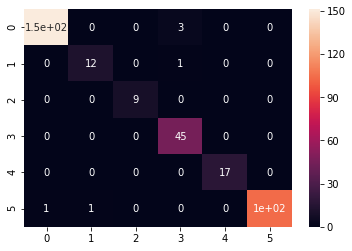

In [41]:
# confusion matrix to test accuracy of training model
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

In [46]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

     Convert       0.99      0.98      0.99       154
      Engage       0.92      0.92      0.92        13
     Enhance       1.00      1.00      1.00         9
      Evolve       0.92      1.00      0.96        45
     Inspire       1.00      1.00      1.00        17
       Trust       1.00      0.98      0.99       106

    accuracy                           0.98       344
   macro avg       0.97      0.98      0.98       344
weighted avg       0.98      0.98      0.98       344



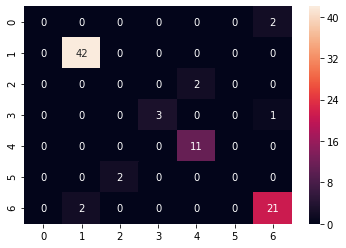

In [44]:
# confusion matrix to test accuracy of testing model
y_predict_test = NB_Classifier.predict(X_test)
cm2 = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm2, annot = True)

In [45]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

   Add Value       0.00      0.00      0.00         2
     Convert       0.95      1.00      0.98        42
      Engage       0.00      0.00      0.00         2
     Enhance       1.00      0.75      0.86         4
      Evolve       0.85      1.00      0.92        11
     Inspire       0.00      0.00      0.00         2
       Trust       0.88      0.91      0.89        23

    accuracy                           0.90        86
   macro avg       0.53      0.52      0.52        86
weighted avg       0.85      0.90      0.87        86



C:\Users\amber.toro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Training On The Whole Labeled Dataset

In [47]:
from sklearn.naive_bayes import MultinomialNB

NB_Classifier = MultinomialNB()
label = df["Page Purpose"].values

In [48]:
# training the model on the full labeled training set
NB_Classifier.fit(df_countvectorizer, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [50]:
# sample test
testing_sample = ["This school is the best! "]

testing_sample_countvectorizer = vectorizer.transform(testing_sample)
NB_Classifier.predict(testing_sample_countvectorizer)

array(['Convert'], dtype='<U9')

In [115]:
# loop to predict and assign values to all unlabeled data in the dataset
Page_Purpose = []

for row in dataset['Page Content']:
    testing_sample_countvectorizor = vectorizer.transform([row])
    purpose = [(NB_Classifier.predict(testing_sample_countvectorizor))]
    Page_Purpose.append(purpose) 
    
dataset['Page_Purpose'] = Page_Purpose

In [116]:
dataset

,Page URL,Page Content,Page_Purpose
0,https://www.wgu.edu/www.wgu.edu,'Degrees',[[Trust]]
1,https://www.wgu.edu/online-degree-programs.html,'WGU is an online school\xa0with career-aligne...,[[Trust]]
2,https://www.wgu.edu/admissions.html,'WGU seeks to admit individuals who have the c...,[[Trust]]
3,https://www.wgu.edu/financial-aid-tuition.html,"""WGU is committed to keeping tuition low—in fa...",[[Enhance]]
4,https://www.wgu.edu/about.html,'This is a university made for a new kind of s...,[[Trust]]
5,https://www.wgu.edu/inquiry.wgu.edu/#!/inquiry...,'Degrees',[[Trust]]
6,https://www.wgu.edu/inquiry.wgu.edu/#!/applica...,'Degrees',[[Trust]]
7,https://www.wgu.edu/online-business-degrees.html,"""You want to be noticed in today's market as a...",[[Trust]]
8,https://www.wgu.edu/online-teaching-degrees.html,'Start exploring your degree options by lookin...,[[Trust]]
9,https://www.wgu.edu/online-it-degrees.html,"""The opportunities in the IT field are limitle...",[[Trust]]


In [123]:
# Saveing predictions to a csv
dataset.to_csv('Page Purpose Whole Labaled Dataset.csv', index = False)

In [124]:
final_df = pd.read_csv('Page Purpose Whole Labaled Dataset.csv')

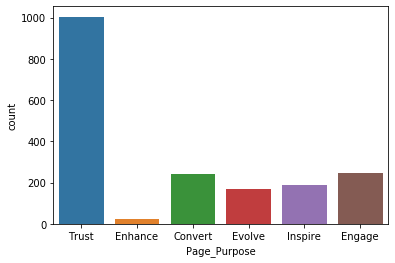

In [126]:
# distribution of final predicted labels
sns.countplot(final_df['Page_Purpose'])